In [1]:
# --------- Python Native ---------
import warnings

# --------- data ---------
import pandas as pd 
# --------- Visualization ---------
import matplotlib.pyplot as plt
import seaborn as sns





In [2]:
sns.set(style="darkgrid")
pd.set_option('display.float_format', '{:,.2f}'.format)
title_data = 'Materiales extraídos en los municipios en Colombia'
paleta = sns.color_palette("tab10").as_hex()
warnings.filterwarnings("ignore")
random_seedd = 73

In [3]:
data_transaction = pd.read_csv('../data_estructurada/data_transaction.csv')
data_production = pd.read_csv('../data_estructurada/data_production.csv')
data_transaction_project = pd.read_csv('../data_estructurada/data_transaction_project.csv')
data_transaction_type_compensation = pd.read_csv('../data_estructurada/data_transaction_type_compensation.csv')
data_natural_resource = pd.read_csv('../data_estructurada/data_natural_resource.csv')


In [23]:
data_transaction.head()

,Unnamed: 0,city,state,sum_transactions_value,mean_transactions_value,median_transactions_value,std_transactions_value,sum_n_transactions,mean_n_transactions,median_n_transactions,std_n_transactions,count_quarter
0,0,ABEJORRAL,ANTIOQUIA,"7,388,574.00","2,462,858.00","1,550,222.00","2,825,024.15",5,1.67,1.00,1.15,3
1,1,ABREGO,NORTE DE SANTANDER,"11,285,674.00","1,128,567.40","1,039,796.50","663,967.08",13,1.30,1.00,0.48,10
2,2,ABRIAQUI,ANTIOQUIA,"284,761,273.00","25,887,388.45","18,377,670.00","21,757,545.39",25,2.27,2.00,0.65,11
3,3,ACACIAS,META,"411,309,931.00","34,275,827.58","34,697,943.50","23,671,575.77",34,2.83,3.00,0.58,12
4,4,ACHI,BOLIVAR,"557,468,046.00","185,822,682.00","206,435,884.00","62,837,094.30",6,2.00,2.00,0.00,3


<Axes: xlabel='mean_transactions_value', ylabel='state'>

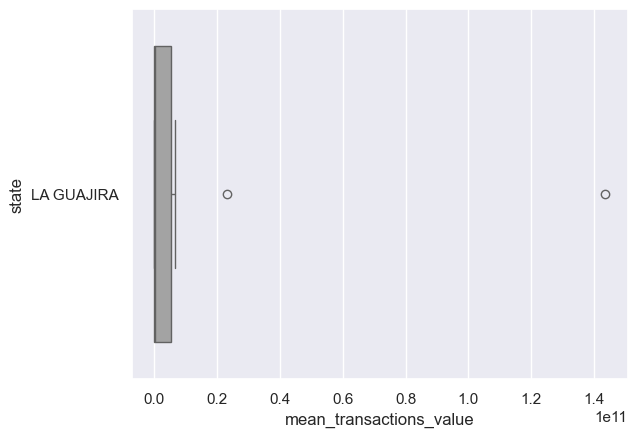

In [29]:
sns.boxplot(
    data_transaction[data_transaction['state']=='LA GUAJIRA'],
    x='mean_transactions_value',
    y='state',
    color=(0.6392156862745098, 0.6392156862745098, 0.6392156862745098),

)

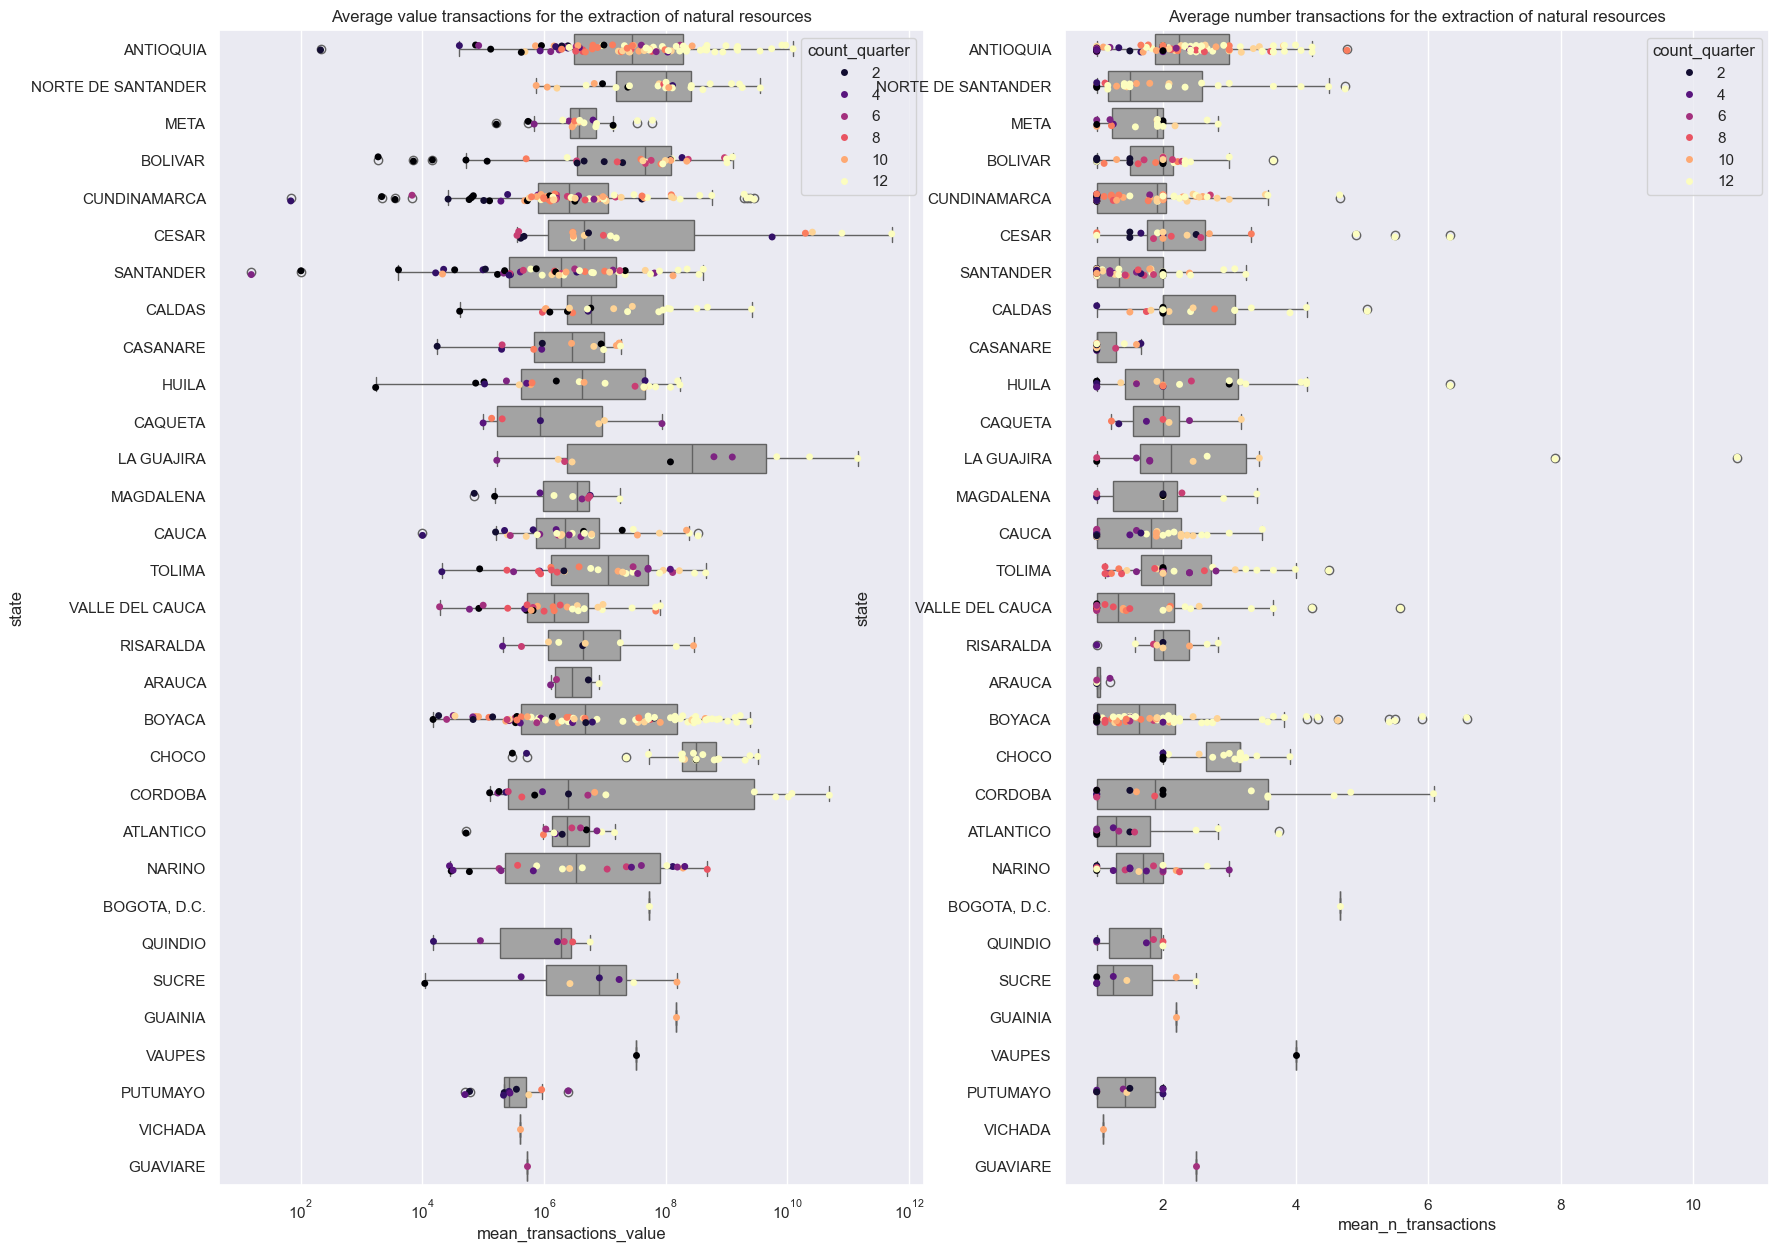

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(20,15))
ax[0].set_xscale("log")
ax[0].set_title("Average value transactions for the extraction of natural resources")
sns.boxplot(
    data_transaction,
    x='mean_transactions_value',
    y='state',
    color=(0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
    ax=ax[0]
)

sns.stripplot(
    data_transaction,
    x='mean_transactions_value',
    y='state',
    hue='count_quarter',
    ax=ax[0],
    palette=sns.color_palette("magma", as_cmap=True)

)


ax[1].set_title("Average number transactions for the extraction of natural resources")
sns.boxplot(
    data_transaction,
    x='mean_n_transactions',
    y='state',
    color=(0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
    ax=ax[1]
)

sns.stripplot(
    data_transaction,
    x='mean_n_transactions',
    y='state',
    color='black',
    ax=ax[1],
    hue='count_quarter',
    palette=sns.color_palette("magma", as_cmap=True)
)

plt.show()

- The transaction amount is transformed to a logarithmic scale.
- There aren't many transactions in state Vichada, Guaviare, VAUPES, GUAINIA AND BOGOTA, D.C. In this states only extract resources natural was is in one city
- The exploitation of natural resource were extremely high in few cities compared to the rest.

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,15))

sns.scatterplot(
    data_transaction, 
    x="mean_transactions_value", 
    y="mean_n_transactions",
    hue='count_quarter',
    palette=sns.color_palette("Paired"),
    ax=ax)

ax2 = plt.axes([.3, .4, .3, .3])


sns.scatterplot(
    data_transaction, 
    x="mean_transactions_value", 
    y="mean_n_transactions",
    hue='count_quarter',
    palette=sns.color_palette("Paired"),
    ax=ax2
)
#ax2.set_ylim([6,5000000.0]) 
ax2.set_xlim([6, 100000000.0]) 
ax2.set_title('zoom')
plt.show()